In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#4 RVs corresponding to 4 sets of likelihood: x_l,x_r | z_l,z_r = 0,0; 0,1; 1,0; 1,1
# dimension of image: D
# no. basis: N
# sigma_n: added noise to image
# sigma_alpha: std of prior on activation

In [3]:
#simplest case for 2D image: base 1 = [1,0]; base 2 = [0,1]
sigma_n = 0.1
sigma_alpha = 2000
D = 2
N = 2
rv00 = stats.multivariate_normal(mean=None, cov = sigma_n**2*np.eye(2*D))
rv01 = stats.multivariate_normal(mean=None, cov = np.vstack((np.hstack((sigma_n**2*np.eye(D),np.zeros((2,2)))),np.hstack((np.zeros((2,2)),sigma_alpha**2*np.eye(D))))))
rv10 = stats.multivariate_normal(mean=None, cov = np.vstack((np.hstack((sigma_alpha**2*np.eye(D),np.zeros((2,2)))),np.hstack((np.zeros((2,2)),sigma_n**2*np.eye(D))))))
rv11 = stats.multivariate_normal(mean=None, cov = np.vstack((np.hstack(((sigma_alpha**2+sigma_n**2)*np.eye(2),sigma_alpha**2*np.eye(2))),np.hstack((sigma_alpha**2*np.eye(2),(sigma_alpha**2+sigma_n**2)*np.eye(2))))))

In [4]:
def post_zlzr(xl,xr):
    p_00_r = rv00.pdf(np.hstack((xl,xr)))
    p_01_r = rv01.pdf(np.hstack((xl,xr)))
    p_10_r = rv10.pdf(np.hstack((xl,xr)))
    p_11_r = rv11.pdf(np.hstack((xl,xr)))
    return np.array([p_00_r,p_01_r,p_10_r,p_11_r]/(p_00_r+p_01_r+p_10_r+p_11_r))

In [15]:
c = np.arange(1,3,0.01)
p_l = []
for ci in c:
    xli=ci*np.array([1,0])
    xri=ci*np.array([0,1])
    p_i = post_zlzr(xli,xri)
    p_i_a = p_i.copy()
    p_l.append(p_i_a)
p_l = np.array(p_l)

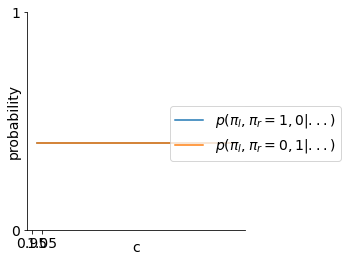

In [16]:
fig,ax = plt.subplots(1)
ax.plot(c,p_l[:,2])
ax.plot(c,p_l[:,1])
ax.set_box_aspect(1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0.95,1.05])
ax.set_yticks([0,1])
ax.set_xlabel('c',labelpad=-10)
ax.set_ylabel('probability',labelpad=-10)
ax.legend([r'$p(\pi_l,\pi_r=1,0|...)$',r'$p(\pi_l,\pi_r=0,1|...)$'],loc='upper center',bbox_to_anchor=(0.55,0,1,0.6))
plt.rcParams['font.size'] = '14'
fig.savefig('caoooo.svg')

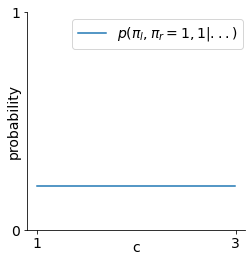

In [17]:
fig,ax = plt.subplots(1)
ax.plot(c,p_l[:,3])
ax.set_box_aspect(1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([1,3])
ax.set_yticks([0,1])
ax.set_xlabel('c',labelpad=-10)
ax.set_ylabel('probability',labelpad=-10)
ax.legend([r'$p(\pi_l,\pi_r=1,1|...)$'],loc='upper center',bbox_to_anchor=(0.1,0,1,1))
plt.rcParams['font.size'] = '14'
fig.savefig('caoooo.svg')

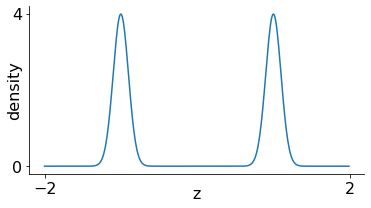

In [14]:
x_bi = np.arange(-2,2,0.01)
y_bi = 1/(2*np.pi*0.01)**0.5*(np.exp(-1/(2*0.01)*(x_bi-1)**2)+np.exp(-1/(2*0.01)*(x_bi+1)**2))

fig,ax = plt.subplots(1)
ax.plot(x_bi,y_bi)

ax.set_box_aspect(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([-2,2])
ax.set_yticks([0,4])

ax.set_xlabel('z',labelpad=-10)
ax.set_ylabel('density',labelpad=-10)

plt.rcParams['font.size'] = '18'
fig.savefig('cao.svg')

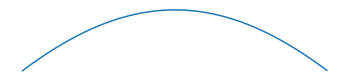

In [34]:
x_bi = np.arange(-2,3,0.01)
y_bi = 1/(2*np.pi*5)**0.5*(np.exp(-1/2/25*(x_bi-0.5)**2))

fig,ax = plt.subplots(1)
ax.plot(x_bi,y_bi)

ax.set_box_aspect(0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])


plt.rcParams['font.size'] = '18'
fig.savefig('caoo.svg')